# DH 302: Midsem Project

# MERCK MOLECULAR ACTIVITY CHALLENGE

#### ~ _Ananya Burli (190020012), Siddhant Kolke (19b030028)_

#### Guide: Professor Ganesh Ramakrishnan

_Indian Institute of Technology, Bombay_

There are 15 molecular targets (ACT1- ACT15). The training set contains a dataset of molecules, with their activities and molecular descriptors given. We need to predict the activity of the various "test" molecules (given in the testing set) in response to each of the 15 molecular targets.

Hence:

Target variable: Activity

Features: Molecular descriptors

**NOTE:** in this notebook, we will be creating a model for one of the targets, i.e. ACT1. This dataset has over 9000 molecular descriptors for over 32000 molecules.

## Step 1: Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import walk

## Step 2: Render the training set for each target as a Pandas dataframe

In [2]:
# giving directory name
directory = '/Users/ananyaraghuburli/Desktop/Year-3/healthcare-minor/MerckActivity/TrainingSet'

# giving file extension
extension = ('.csv')
f=[]
# iterating over all files
for files in os.listdir(directory):
    if files.endswith(extension):
        f.append(files) # printing file name of desired extension
    else:
        continue

In [3]:
f

['ACT15_competition_training.csv',
 'ACT11_competition_training.csv',
 'ACT7_competition_training.csv',
 'ACT3_competition_training.csv',
 'ACT10_competition_training.csv',
 'ACT14_competition_training.csv',
 'ACT1_competition_test.csv',
 'ACT2_competition_training.csv',
 'ACT6_competition_training.csv',
 'ACT4_competition_training.csv',
 'ACT12_competition_training.csv',
 'ACT8_competition_training.csv',
 'ACT1_competition_training.csv',
 'ACT5_competition_training.csv',
 'ACT9_competition_training.csv',
 'ACT13_competition_training.csv']

In [3]:
df=pd.read_csv('ACT1_competition_training.csv')

In [4]:
df.head(5)

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,ACT1_M_139577,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37237,ACT1_M_139579,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37238,ACT1_M_139580,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,ACT1_M_147780,4.3678,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.dropna(subset=['Act'],axis=0,inplace=True)

In [7]:
df

,MOLECULE,Act,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,6.0179,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,5.2697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,6.1797,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,ACT1_M_139577,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37237,ACT1_M_139579,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37238,ACT1_M_139580,4.3003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,ACT1_M_147780,4.3678,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Clearly, there are no missing activity values, so we need not drop any molecules (rows).

In [8]:
#creating the target variable, which is the activity of the molecule against the target:
target=df['Act'] 

In [9]:
target

0        6.0179
1        4.3003
2        5.2697
3        6.1797
4        4.3003
          ...  
37236    4.3003
37237    4.3003
37238    4.3003
37239    4.3678
37240    4.3003
Name: Act, Length: 37241, dtype: float64

In [10]:
t=np.array(target)
np.max(t)

8.134

In [11]:
#separating the features (molecular descriptors) from the target variable:
df.drop('Act', axis=1, inplace=True) 

In [12]:
df

,MOLECULE,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,ACT1_M_80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACT1_M_189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACT1_M_190,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACT1_M_402,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACT1_M_659,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,ACT1_M_139577,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37237,ACT1_M_139579,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37238,ACT1_M_139580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,ACT1_M_147780,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#drop the molecule names from the data set:
df.drop('MOLECULE', axis=1, inplace=True)

In [14]:
df

,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,D_17,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 3: Missing Value Imputation

We need to account for any missing values in the molecular descriptors of the 37,241 molecules in this dataset.

Let us first look at the data type of the values:

In [15]:
df.dtypes

D_3        int64
D_4        int64
D_5        int64
D_6        int64
D_7        int64
           ...  
D_11068    int64
D_11070    int64
D_11074    int64
D_11076    int64
D_11078    int64
Length: 9491, dtype: object

Looks like they are all of integer type.

In [16]:
df.isna()

,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,D_17,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
37239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df.isna().sum()/len(df)*100

D_3        0.0
D_4        0.0
D_5        0.0
D_6        0.0
D_7        0.0
          ... 
D_11068    0.0
D_11070    0.0
D_11074    0.0
D_11076    0.0
D_11078    0.0
Length: 9491, dtype: float64

Since the values of the molecular descriptors are integral and the matrix is sparse, it is suitable to replace any missing values with the median value in the dataframe.

In [18]:
df.fillna(df.median(), inplace= True)

In [19]:
df

,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,D_17,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 4: Scaling

Let us check if we need to scale the data provided to us. By observation of the dataset, we see that the matrix of features and molecules is sparse and ridden with lots of zeroes. Let us check the nature of the non-zero values by judging the mean of values in each column.

In [20]:
df_max=df.max()

In [21]:
df_max=np.array(df_max)
df_max

array([3, 2, 1, ..., 1, 1, 1])

In [22]:
max_max=np.max(df_max)
max_max

109

In [23]:
np.where(df_max==max_max)

(array([2487]),)

Let us divide the whole matrix by the maximum value in the matrix.

In [24]:
df_scaled=df/max_max

In [25]:
df_scaled

,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_11,D_15,D_17,...,D_11061,D_11064,D_11065,D_11066,D_11067,D_11068,D_11070,D_11074,D_11076,D_11078
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 5: Visualise the distribution of features

Let us take a look at some of the features in the dataset and check their distribution.

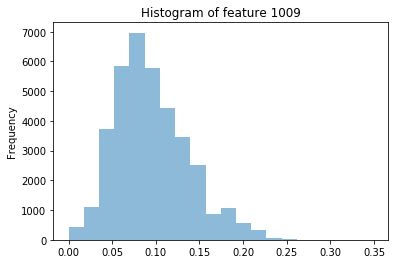

In [26]:
df_scaled.iloc[:,1008].plot.hist(bins=20,alpha=0.5)
plt.title("Histogram of feature 1009")
plt.savefig("hist-1009.png")

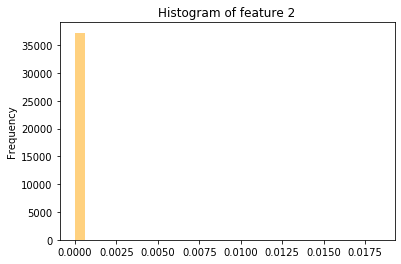

In [27]:
df_scaled.iloc[:,1].plot.hist(bins=30, alpha=0.5, color="orange")
plt.title("Histogram of feature 2")
plt.savefig("hist-2.png")

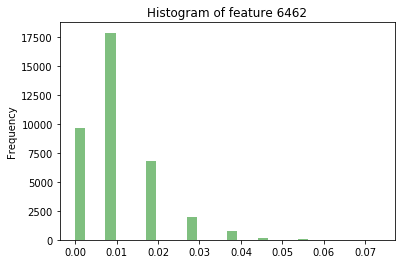

In [28]:
df_scaled.iloc[:,6461].plot.hist(bins=30, alpha=0.5, color="green")
plt.title("Histogram of feature 6462")
plt.savefig("hist-6462.png")

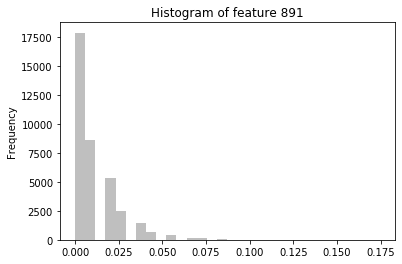

In [29]:
df_scaled.iloc[:,890].plot.hist(bins=30, alpha=0.5, color="gray")
plt.title("Histogram of feature 891")
plt.savefig("hist-891.png")

## Step 6: Feature Selection

Note that there are 9491 molecular descriptors. To avoid overfitting the data, it is important to select the "important" features.

In [31]:
#Dropping 0 variance features:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.0001)    
X = selection.fit_transform(df_scaled)

In [32]:
X.shape

(37241, 397)

The modified dataset now has 397 features instead.

## Step 7: Correlation matrix of features

Once we have selected the features, let us visualise their correlation. The lesser the correlation between two features, the better the selection of your features has been. We aim to get rid of redundant and quasi-constant features, to avoid overfitting and improve accuracy, computational speed of the model.

In [33]:
import seaborn as sns

In [34]:
X_df=pd.DataFrame(X)

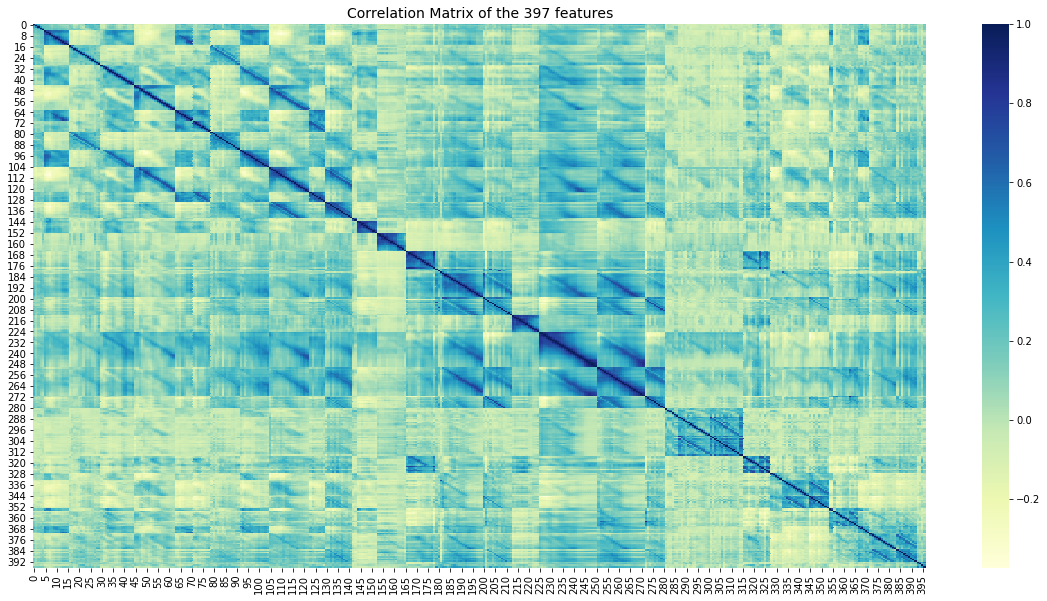

AttributeError: module 'matplotlib.pyplot' has no attribute 'savefif'

In [54]:
corr = X_df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix of the 397 features", fontsize=14)
plt.show()
#plt.savefig("corr-features.png")

Let us further drop the high correlation features.

In [40]:
#Reference: https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = X_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [41]:
len(to_drop)

284

In [43]:
X_df.drop(X_df[to_drop], axis=1)

,0,1,2,3,4,5,16,17,18,19,...,382,386,387,390,391,392,393,394,395,396
0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.009174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.036697,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.018349,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.000000,0.000000,0.009174,0.000000,0.000000,0.000000,0.000000,...,0.0,0.018349,0.000000,0.009174,0.009174,0.000000,0.018349,0.018349,0.018349,0.009174
4,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.009174,0.009174,0.064220,...,0.0,0.009174,0.027523,0.018349,0.009174,0.018349,0.000000,0.018349,0.009174,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37236,0.000000,0.000000,0.0,0.000000,0.000000,0.018349,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.009174,0.009174,0.000000,0.000000,0.036697,0.036697,0.009174,0.000000
37237,0.000000,0.000000,0.0,0.000000,0.000000,0.018349,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.009174,0.009174,0.000000,0.000000,0.036697,0.036697,0.018349,0.000000
37238,0.000000,0.000000,0.0,0.009174,0.000000,0.000000,0.009174,0.009174,0.009174,0.009174,...,0.0,0.027523,0.027523,0.018349,0.018349,0.000000,0.000000,0.000000,0.000000,0.009174
37239,0.018349,0.027523,0.0,0.000000,0.009174,0.009174,0.009174,0.009174,0.000000,0.000000,...,0.0,0.009174,0.000000,0.036697,0.036697,0.036697,0.018349,0.000000,0.000000,0.027523


We are now down to 113 features.

## Step 8: Splitting dataset into train + test

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_df, target, test_size=0.2, random_state=3) #80 - 20 split

## Step 9: Model Building

Let us build a regression model for predicting the activity of the test molecules against the target ACT1.

First, let us go ahead with multilinear regression to check the linearity of the data.

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

LR = linear_model.LinearRegression()
LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_test)
error = mean_squared_error(Y_pred,Y_test)
error

0.22210604225750297

In [47]:
from sklearn.metrics import r2_score
r2_score(Y_pred,Y_test)

-0.05520075667344182

The mean squared error is quite **negative**. This indicates the high degree of non-linearity of the dataset. 

We have more samples (molecules) than features. Let us try the KNeighboursRegressor, RadiusNeighboursRegressor

In [49]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=2) #can experiment with the number of neighbours
KNR.fit(X_train, Y_train)
score = KNR.score(X_test, Y_test)
score

0.5422492447533245

In [50]:
Y_pred=KNR.predict(X_test)
r2_score(Y_pred,Y_test)

0.4844606730056401

In [52]:
from sklearn.svm import SVR

SVR=SVR(C=0.85, epsilon=0.1)   #experimenting with the C and epsilon values to increase score
SVR.fit(X_train, Y_train)
score = SVR.score(X_test, Y_test)
score

0.5626424855891778

In [53]:
Y_pred=SVR.predict(X_test)
r2_score(Y_pred,Y_test)

0.1253316172871024

## Step 10: Prediction using the model

Now that the model has been constructed, we can use it to predict the activity of more, new molecules. Let us import that dataset as a dataframe.

## Conclusion

In conclusion, we aim to  assist  a  medical  scientist  to  incorporate  those  drugs  into  trials  that  minimize  off-target  effects.   This  would eventually enable a clinical practitioner in diagnosing safe and effective medicines.  The objective is to identify the best statistical techniques for predicting biological activities of different molecules, both on- and off-target.

We have attempted to quantify the same using regression-based activity prediction of molecules against the target ACT1. We see that the K Neighbours Regressor seems to work the "best" out of the models.